# Kaggle Competition: Titanic - Machine Learning from Disaster
URL: https://www.kaggle.com/competitions/titanic

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
import os

---------
----------
------------
-----------

## 1. Extracting and Looking at Data

In [ ]:
os.chdir("../nodes")

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Checking the number of missing data points:

In [7]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


--------------
-----------------
-------------

# 2. Some Data Preparations

## 2.1. Droping Some Features
The values of "Name" and "PassengerId" are unique for each passenger. So, we will drop these features.

We check the values of the feature "Ticket" to see how unique they are. 
This feature seems to be useless for developing the models.

In [11]:
train_data['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

As we can see, there are 681 different ticket numbers for 891 passengers. So, it apparently dosen't contain valuable information we can use.

On the other hand, the feature "Cabin" has 687 missing values (out of 891). Moreover, it may present unique values. Lets check it.

In [12]:
train_data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

So, it contains 147 unique values (out of 204 recorded values). So, we can drop this feature, too.

In [13]:
cols_drop = ['PassengerId','Name','Ticket','Cabin']
train_df = train_data.copy().drop(columns=cols_drop)
test_df = test_data.copy().drop(columns=cols_drop)

## 2.2. Converting Some Features
Lets change 'Sex' to binary values.

In [14]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
train_df.loc[train_df['Sex']=='male', 'Sex'] = 0
train_df.loc[train_df['Sex']=='female', 'Sex'] = 1

test_df.loc[test_df['Sex']=='male', 'Sex'] = 0
test_df.loc[test_df['Sex']=='female', 'Sex'] = 1

# change the type of column 'Sex' to int
train_df['Sex'] = train_df['Sex'].astype('int')
test_df['Sex'] = test_df['Sex'].astype('int')

train_df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

We apply one-hot encoding to 'Pclass' and 'Embarked'.

In [16]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train_df[['Pclass']])
Pclass_train_df = pd.DataFrame(enc.transform(train_df[['Pclass']]).toarray())
Pclass_test_df = pd.DataFrame(enc.transform(test_df[['Pclass']]).toarray())

# adding the new features to the datasets
train_df[['Pc1','Pc2','Pc3']] = Pclass_train_df.copy()
test_df[['Pc1','Pc2','Pc3']] = Pclass_test_df.copy()

# dropping the original feature 
train_df.drop(columns=['Pclass'], inplace=True)
test_df.drop(columns=['Pclass'], inplace=True)

Now, lets apply one hot encoding to the feature 'Embarked'. This feature has 2 missing values inthe train set.

In [18]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Considering the missing values in "Embarked", the fact that to use "KNNImputer" we have to convert the categorical values, and the fact that to use "OneHotEncoder" we should not have np.nan values:
We implement the procedure explained in https://stackoverflow.com/questions/62868129/cyclical-loop-between-onehotencoder-and-knnimpute-in-scikit-learn:

* Fill categorical missings with pandas or SimpleImputer with the string "missing".
* Use OneHotEncoder then.
* Use the one-hot encoder's get_feature_names to identify the columns corresponding to each original feature, and in particular the "missing" indicator.
* For each row and each original categorical feature, when the 1 is in the "missing" column, replace the 0's with np.nan; then delete the missing indicator column.
* Now everything should be set up to run KNNImputer.
* Finally, if desired, postprocess the imputed categorical-encoding columns. (Simply rounding might get you an all-zeros row for a categorical feature, but I don't think with KNNImputer you could get more than one 1 in a row. You could argmax instead to get back exactly one 1.)

First, we replace the mising values of 'Embarked' with 'Missing'.

In [19]:
sim_imp = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='Missing')
train_df['Embarked'] = sim_imp.fit_transform(train_df[['Embarked']])
train_df[['Embarked']].isna().sum()

Embarked    0
dtype: int64

Then, we apply 'OneHotEncoder' to the dataset.

In [20]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train_df[['Embarked']])
embarked_train_df = pd.DataFrame(enc.transform(train_df[['Embarked']]).toarray())
embarked_test_df = pd.DataFrame(enc.transform(test_df[['Embarked']]).toarray())

In [21]:
embarked_train_df[1].value_counts()

0.0    889
1.0      2
Name: 1, dtype: int64

So, the second column represents the 'Missing' values. For each row where this variable is 1, the other varaibels of 'embarked_df' have to be np.nan. 

In [22]:
embarked_train_df.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [23]:
embarked_train_df[embarked_train_df[1] == 1] = np.nan
embarked_train_df.isna().sum()

0    2
1    2
2    2
3    2
dtype: int64

Now, we can integrate the other columns of 'embarked_df' (except the second column) into 'train_df'.

In [24]:
train_df[['em1','em2','em3']] = embarked_train_df[[0,2,3]].copy()
test_df[['em1','em2','em3']] = embarked_test_df[[0,2,3]].copy()

train_df.drop(columns=['Embarked'], inplace=True)
test_df.drop(columns=['Embarked'], inplace=True)

In [25]:
train_df.isna().sum()

Survived      0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Pc1           0
Pc2           0
Pc3           0
em1           2
em2           2
em3           2
dtype: int64

In [26]:
test_df.isna().sum()

Sex       0
Age      86
SibSp     0
Parch     0
Fare      1
Pc1       0
Pc2       0
Pc3       0
em1       0
em2       0
em3       0
dtype: int64

## 2.3. Data Imputation
Now, we can apply 'KNNImputer' to the datasets. Both train and test sets have similar features in similar order, except for the feature 'Survived'.

In [27]:
col_exc = ['Survived']
imputer = KNNImputer(n_neighbors=10)
imputer.fit(train_df.drop(columns=col_exc))
train_imp = pd.DataFrame(imputer.transform(train_df.drop(columns=col_exc)), columns=test_df.columns)
test_imp = pd.DataFrame(imputer.transform(test_df), columns=test_df.columns)

# adding 'Survived' to the train set
train_imp = train_imp.join(train_df[['Survived']])

----------------
------------------
-----------------
# 3. Data Analysis

What percentage of the passengers survived?

In [28]:
train_imp['Survived'].value_counts()/len(train_imp)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Taking a look at the correlations:

Text(0.5, 1.0, 'Correlation Heatmap in Train Set')

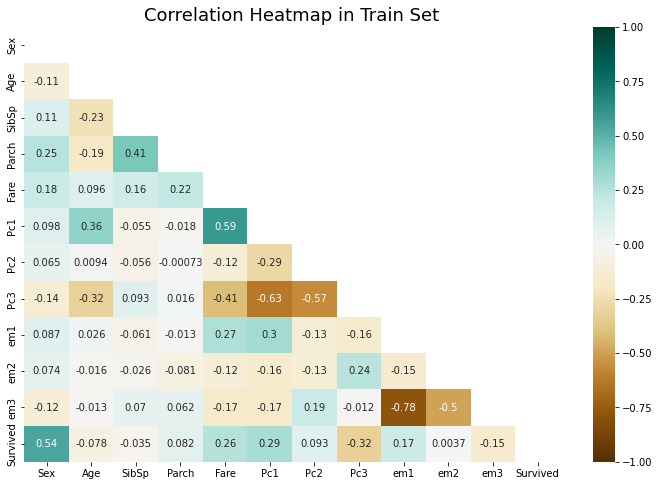

In [29]:
plt.figure(figsize=(12,8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(train_imp.corr(), dtype=bool))
heatmap = sns.heatmap(train_imp.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap in Train Set', fontdict={'fontsize':18})

What percentage of men (0) and women (1) survived?

In [30]:
a = train_imp[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()
a['Percentage_from_all'] = [train_imp[train_imp['Sex']==a.loc[0,'Sex']].shape[0]/len(train_imp),
                            train_imp[train_imp['Sex']==a.loc[1,'Sex']].shape[0]/len(train_imp)]
a

,Sex,Survived,Percentage_from_all
0,0.0,0.188908,0.647587
1,1.0,0.742038,0.352413


What is the relation between the number of sibling/spouse and survival?

In [31]:
a = train_imp[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean()
a['Percentage_from_all'] = [train_imp[train_imp['SibSp']==a.loc[0,'SibSp']].shape[0]/len(train_imp),
                            train_imp[train_imp['SibSp']==a.loc[1,'SibSp']].shape[0]/len(train_imp),
                            train_imp[train_imp['SibSp']==a.loc[2,'SibSp']].shape[0]/len(train_imp),
                            train_imp[train_imp['SibSp']==a.loc[3,'SibSp']].shape[0]/len(train_imp),
                            train_imp[train_imp['SibSp']==a.loc[4,'SibSp']].shape[0]/len(train_imp),
                            train_imp[train_imp['SibSp']==a.loc[5,'SibSp']].shape[0]/len(train_imp),
                            train_imp[train_imp['SibSp']==a.loc[6,'SibSp']].shape[0]/len(train_imp)]
a

,SibSp,Survived,Percentage_from_all
0,0.0,0.345395,0.682379
1,1.0,0.535885,0.234568
2,2.0,0.464286,0.031425
3,3.0,0.250000,0.017957
4,4.0,0.166667,0.020202
5,5.0,0.000000,0.005612
6,8.0,0.000000,0.007856


What is the relation between the number of parents/children and survival?

In [32]:
a = train_imp[['Parch','Survived']].groupby(['Parch'], as_index=False).mean()
a['Percentage_from_all'] = [train_imp[train_imp['Parch']==a.loc[0,'Parch']].shape[0]/len(train_imp),
                            train_imp[train_imp['Parch']==a.loc[1,'Parch']].shape[0]/len(train_imp),
                            train_imp[train_imp['Parch']==a.loc[2,'Parch']].shape[0]/len(train_imp),
                            train_imp[train_imp['Parch']==a.loc[3,'Parch']].shape[0]/len(train_imp),
                            train_imp[train_imp['Parch']==a.loc[4,'Parch']].shape[0]/len(train_imp),
                            train_imp[train_imp['Parch']==a.loc[5,'Parch']].shape[0]/len(train_imp),
                            train_imp[train_imp['Parch']==a.loc[6,'Parch']].shape[0]/len(train_imp)]
a

,Parch,Survived,Percentage_from_all
0,0.0,0.343658,0.760943
1,1.0,0.550847,0.132435
2,2.0,0.500000,0.089787
3,3.0,0.600000,0.005612
4,4.0,0.000000,0.004489
5,5.0,0.200000,0.005612
6,6.0,0.000000,0.001122


What is the relation between the ticket class and survival?

In [33]:
a = train_data[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()
a['Percentage_from_all'] = [train_data[train_data['Pclass']==a.loc[0,'Pclass']].shape[0]/len(train_data),
                            train_data[train_data['Pclass']==a.loc[1,'Pclass']].shape[0]/len(train_data),
                            train_data[train_data['Pclass']==a.loc[2,'Pclass']].shape[0]/len(train_data)]
a

,Pclass,Survived,Percentage_from_all
0,1,0.629630,0.242424
1,2,0.472826,0.206510
2,3,0.242363,0.551066


What is the relation between the port of embarkation and survival?

In [34]:
a = train_data[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()
a['Percentage_from_all'] = [train_data[train_data['Embarked']==a.loc[0,'Embarked']].shape[0]/len(train_data),
                            train_data[train_data['Embarked']==a.loc[1,'Embarked']].shape[0]/len(train_data),
                            train_data[train_data['Embarked']==a.loc[2,'Embarked']].shape[0]/len(train_data)]
a

,Embarked,Survived,Percentage_from_all
0,C,0.553571,0.188552
1,Q,0.389610,0.086420
2,S,0.336957,0.722783


How the fare paid by the passengers relate to their survival?

Text(0, 0.5, 'Survived')

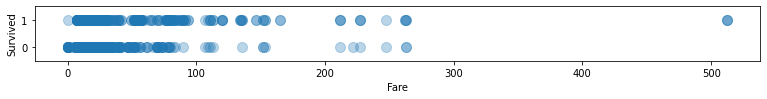

In [35]:
plt.figure(figsize=(13,1))
plt.scatter(train_imp['Fare'], train_imp['Survived'], s=100, alpha=0.3)
plt.ylim(-0.5,1.5)
plt.xlabel('Fare')
plt.ylabel('Survived')

How the age of the passengers relate to their survival?

Text(0, 0.5, 'Survived')

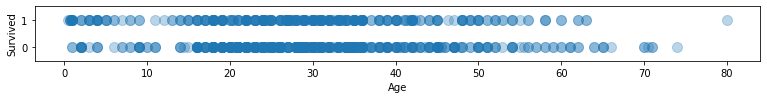

In [36]:
plt.figure(figsize=(13,1))
plt.scatter(train_imp['Age'], train_imp['Survived'], s=100, alpha=0.3)
plt.ylim(-0.5,1.5)
plt.xlabel('Age')
plt.ylabel('Survived')

-------------------
-----------------
-------------------
# 4. Model Training
## 4.1. Data Normalization
Normalizing the data based on the train set

In [37]:
cols_exc_train = ['Sex','Pc1','Pc2','Pc3','em1','em2','em3','Survived'] # excluding binary features
cols_exc_test = ['Sex','Pc1','Pc2','Pc3','em1','em2','em3'] # excluding binary features

train_max = train_imp.drop(columns=cols_exc_train).max()
train_min = train_imp.drop(columns=cols_exc_train).min()

A1 = (train_min - train_imp.drop(columns=cols_exc_train))/(train_min - train_max)
A2 = (train_min - test_imp.drop(columns=cols_exc_test))/(train_min - train_max)

train_in = A1.join(train_imp[cols_exc_test])
test_in = A2.join(test_imp[cols_exc_test])
train_out = train_imp[['Survived']]

In [38]:
train_in.describe().round(2)

,Age,SibSp,Parch,Fare,Sex,Pc1,Pc2,Pc3,em1,em2,em3
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.37,0.07,0.06,0.06,0.35,0.24,0.21,0.55,0.19,0.09,0.72
std,0.17,0.14,0.13,0.10,0.48,0.43,0.41,0.50,0.39,0.28,0.45
min,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.27,-0.00,-0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.36,0.00,0.00,0.03,0.00,0.00,0.00,1.00,0.00,0.00,1.00
75%,0.45,0.12,-0.00,0.06,1.00,0.00,0.00,1.00,0.00,0.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [39]:
test_in.describe().round(2)

,Age,SibSp,Parch,Fare,Sex,Pc1,Pc2,Pc3,em1,em2,em3
count,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00
mean,0.38,0.06,0.07,0.07,0.36,0.26,0.22,0.52,0.24,0.11,0.65
std,0.16,0.11,0.16,0.11,0.48,0.44,0.42,0.50,0.43,0.31,0.48
min,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.27,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.35,-0.00,-0.00,0.03,0.00,0.00,0.00,1.00,0.00,0.00,1.00
75%,0.45,0.12,-0.00,0.06,1.00,1.00,0.00,1.00,0.00,0.00,1.00
max,0.95,1.00,1.50,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Developing a Random Forest model

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import accuracy_score

In [41]:
model_rf = RandomForestClassifier(n_estimators=200)
param = {'max_depth'    : Integer(1, 30),
         'max_features' : Integer(1, 11),
         'max_samples'  : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
cv = RepeatedKFold(n_repeats=1, n_splits=5, random_state=1)
b_search = BayesSearchCV(model_rf, param, cv=cv, return_train_score=True, n_jobs=-1, verbose=0)
b_search.fit(train_in, train_out.values.ravel())

BayesSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
              estimator=RandomForestClassifier(n_estimators=200), n_jobs=-1,
              return_train_score=True,
              search_spaces={'max_depth': Integer(low=1, high=30, prior='uniform', transform='normalize'),
                             'max_features': Integer(low=1, high=11, prior='uniform', transform='normalize'),
                             'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                             0.8, 0.9, 1.0]})

In [42]:
print(f"Mean train score = {b_search.cv_results_['mean_train_score'][b_search.best_index_].round(4)}")
print(f"Mean test score = {b_search.cv_results_['mean_test_score'][b_search.best_index_].round(4)}")

Mean train score = 0.9346
Mean test score = 0.8317


In [43]:
b_search.best_params_

OrderedDict([('max_depth', 8), ('max_features', 10), ('max_samples', 1.0)])

In [44]:
model_rf_optim = RandomForestClassifier(max_depth=b_search.best_params_['max_depth'],
                                         max_features=b_search.best_params_['max_features'],
                                         max_samples=b_search.best_params_['max_samples'],
                                         random_state=0)
model_rf_optim.fit(train_in, train_out.values.ravel())

RandomForestClassifier(max_depth=8, max_features=10, max_samples=1.0,
                       random_state=0)

In [45]:
aa = pd.DataFrame([b_search.predict(test_in),model_rf_optim.predict(test_in)]).T
pd.DataFrame([aa[0] == aa[1]]).T.value_counts()

True     415
False      3
dtype: int64

In [46]:
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [47]:
predictions = pd.DataFrame([test_data['PassengerId'], model_rf_optim.predict(test_in)]).T
predictions.columns = ['PassengerId','Survived']
predictions

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [48]:
predictions.to_csv('submission.csv', index=False)